In [27]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Clean

In [28]:
train = pd.read_csv('https://raw.githubusercontent.com/ryskgit/QTW_CaseStudy/main/Case%20Study%201/Raw%20Data%201/train.csv')
material = pd.read_csv('https://raw.githubusercontent.com/ryskgit/QTW_CaseStudy/main/Case%20Study%201/Raw%20Data%201/unique_m.csv')
train.drop(columns="critical_temp", inplace=True)
df = pd.concat([train, material], axis=1)
df.drop(columns='material', inplace=True)

# same way with pd.merge()
# df = pd.merge(train, material, left_index=True, right_index=True)
# df.drop(columns=["critical_temp_y", "material"], inplace=True)
# df.rename(columns={"critical_temp_x":"critical_temp"}, inplace=True)

In [29]:
single_vals = df.columns[df.eq(df.iloc[0]).all()].tolist()
print(f"There are {len(single_vals)} columns with single values: {single_vals}")
print(f"Original data dimiension: {df.shape}")
df.drop(columns=single_vals, inplace=True)
print(f"Final data dim after dropping aforementioned columns: {df.shape}")
print(f"There are {df.isna().sum().sum()} NA values and {df.duplicated().sum()} duplicated records")

There are 9 columns with single values: ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']
Original data dimiension: (21263, 168)
Final data dim after dropping aforementioned columns: (21263, 159)
There are 0 NA values and 0 duplicated records


In [30]:
df.dtypes.value_counts()

float64    156
int64        3
dtype: int64

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,4,88.944468,57.885242,66.361592,36

In [33]:
pd.reset_option("max_columns")

# EDA

In [58]:
len(df.columns)

159

In [68]:
df2 = df.copy()


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [69]:
df2_sub = df2.iloc[:, :81]

In [72]:
df2_sub.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [73]:
# correlation plot
df2_sub.corr()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.609412,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.374099,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.534450,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.487021,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.599413,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wtd_entropy_Valence,0.892559,-0.145610,-0.331025,-0.307662,-0.448072,0.861479,0.918284,0.683238,-0.409599,0.540601,...,-0.558969,-0.636286,-0.563527,-0.648708,0.910822,1.000000,0.204411,-0.639818,0.089774,0.081284
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.085892,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.554338,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.164058,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856


In [78]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [82]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [86]:
df2_sub.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'number_of_elements'}>,
        <AxesSubplot:title={'center':'mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_mean_atomic_mass'}>,
        <AxesSubplot:title={'center':'gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_gmean_atomic_mass'}>,
        <AxesSubplot:title={'center':'entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_entropy_atomic_mass'}>,
        <AxesSubplot:title={'center':'range_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_range_atomic_mass'}>],
       [<AxesSubplot:title={'center':'std_atomic_mass'}>,
        <AxesSubplot:title={'center':'wtd_std_atomic_mass'}>,
        <AxesSubplot:title={'center':'mean_fie'}>,
        <AxesSubplot:title={'center':'wtd_mean_fie'}>,
        <AxesSubplot:title={'center':'gmean_fie'}>,
        <AxesSubplot:title={'center':'wtd_gmean_fie'}>,
        <AxesSubplot:title={'center':'entropy_fie'}>,
        <AxesSubplot:title={'center':'wtd_entropy_fi

In [83]:
plotCorrelationMatrix(df2_sub, 20)

AttributeError: 'DataFrame' object has no attribute 'dataframeName'

In [81]:
plotPerColumnDistribution(df, 10, 5)

ValueError: Number of rows must be a positive integer, not 3.8

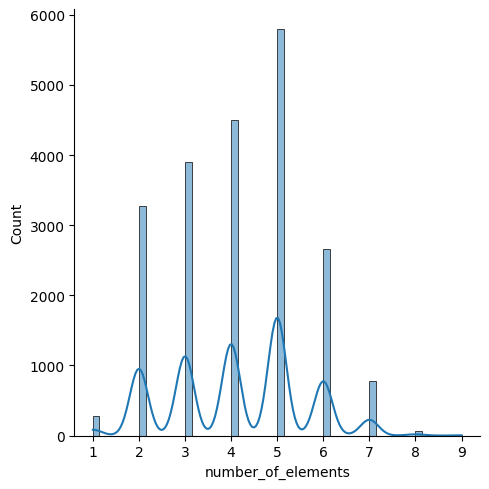

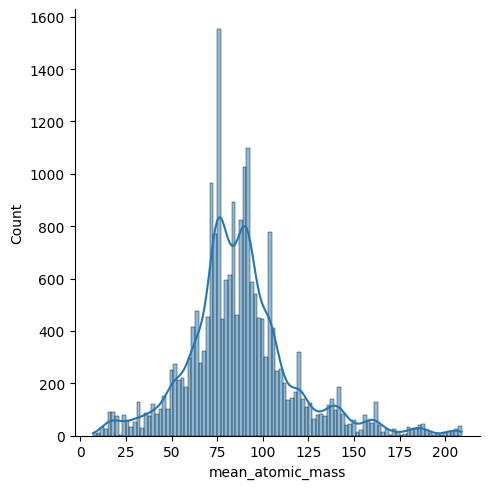

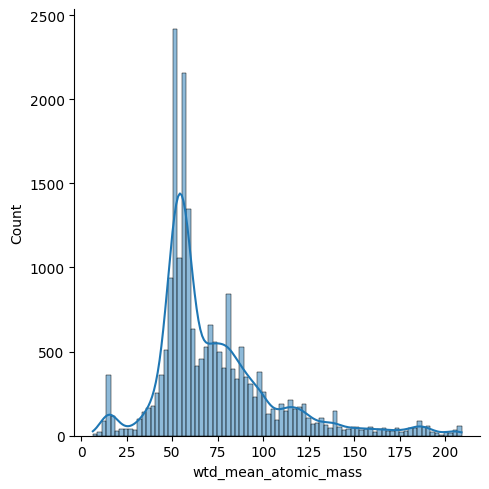

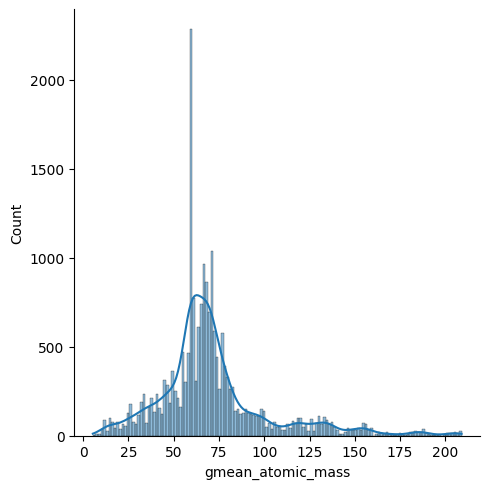

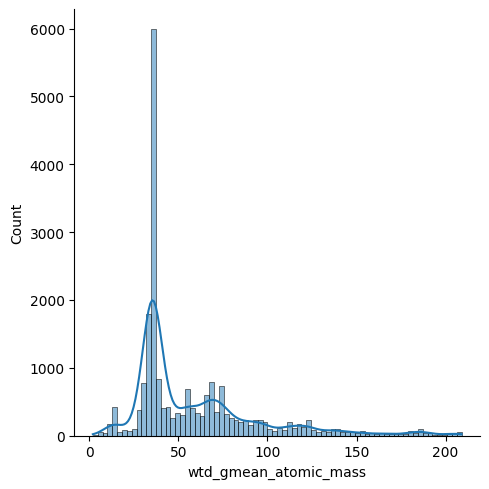

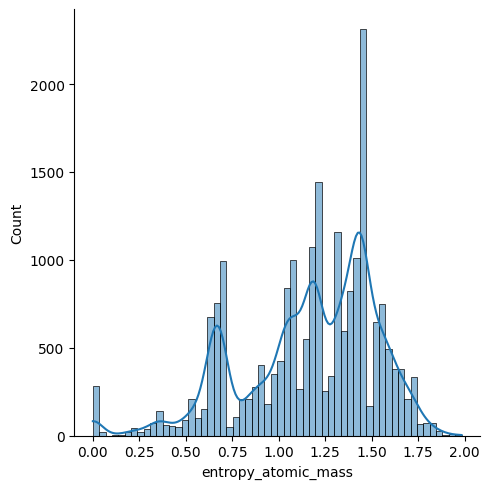

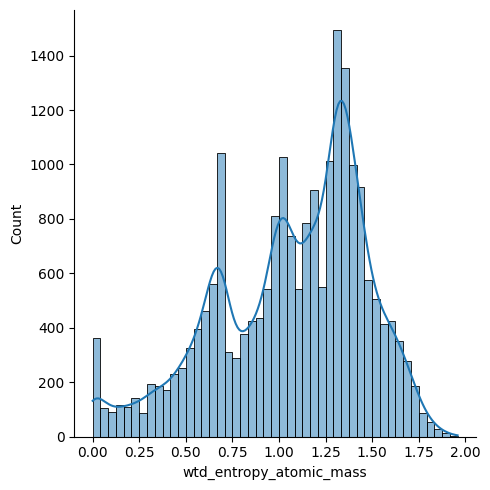

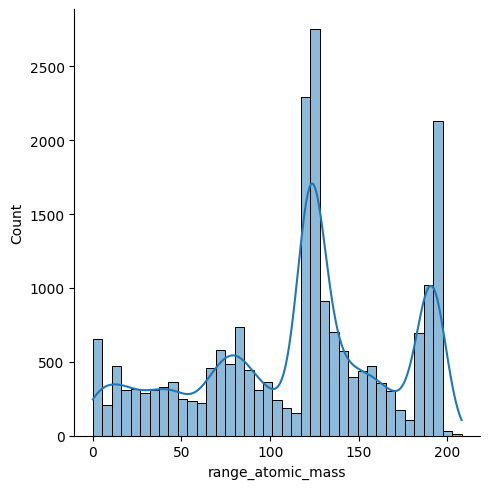

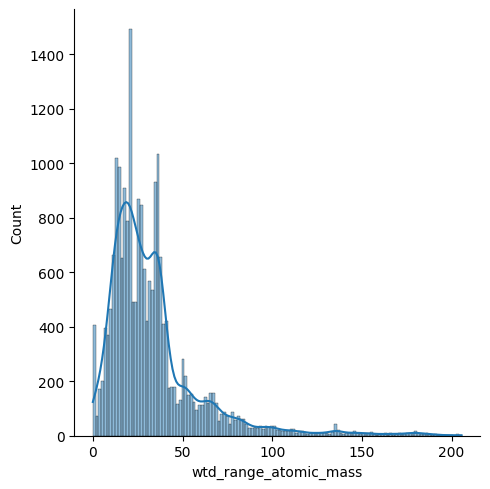

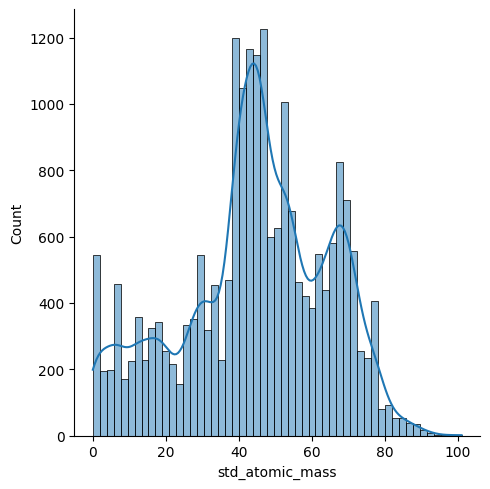

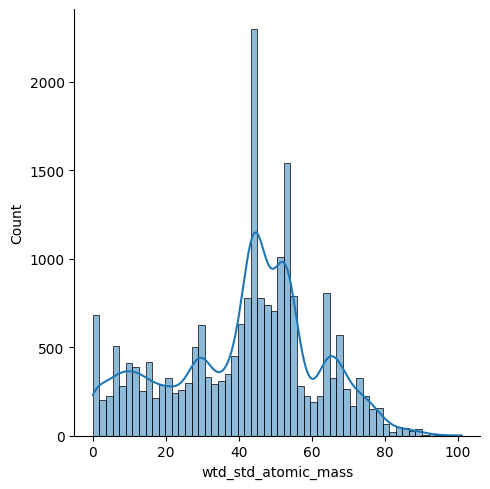

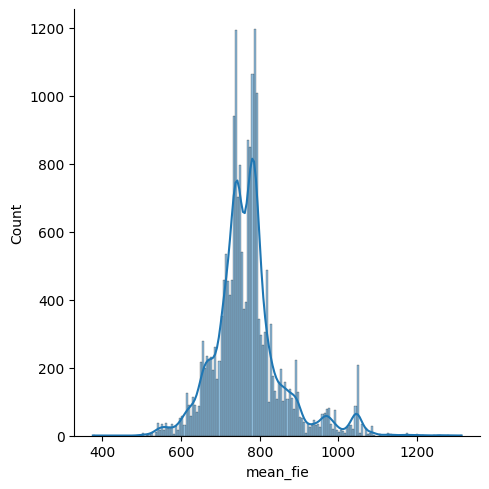

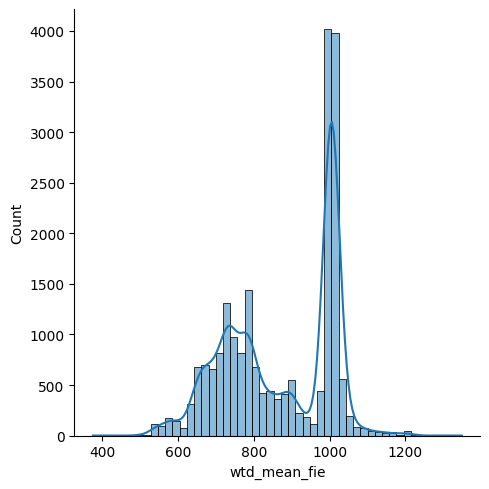

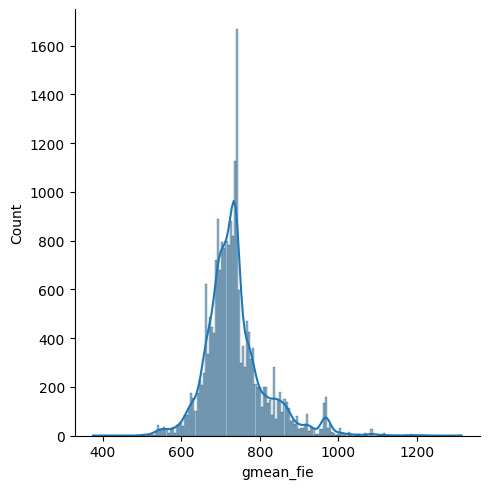

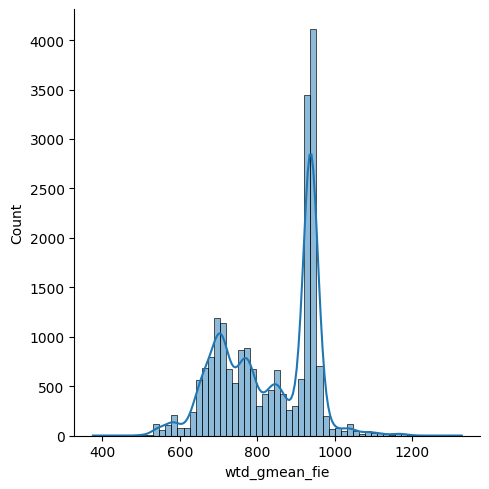

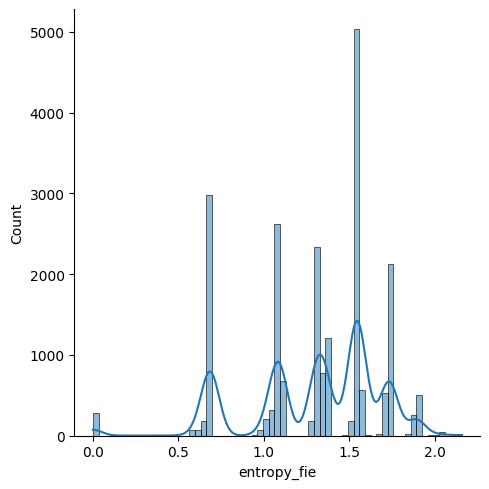

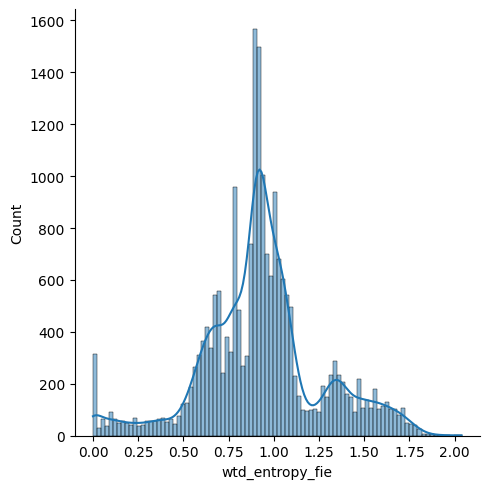

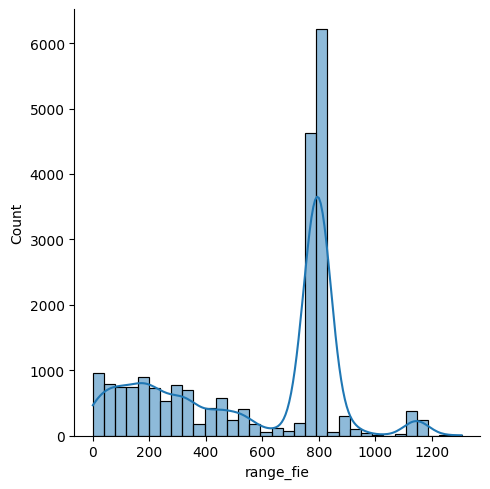

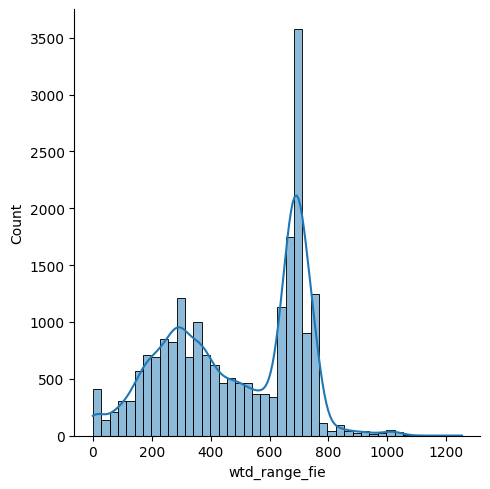

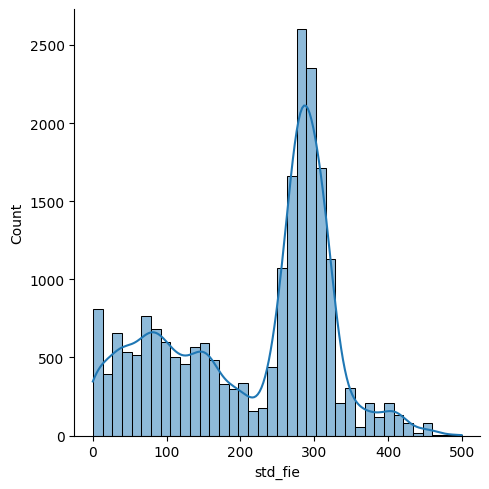

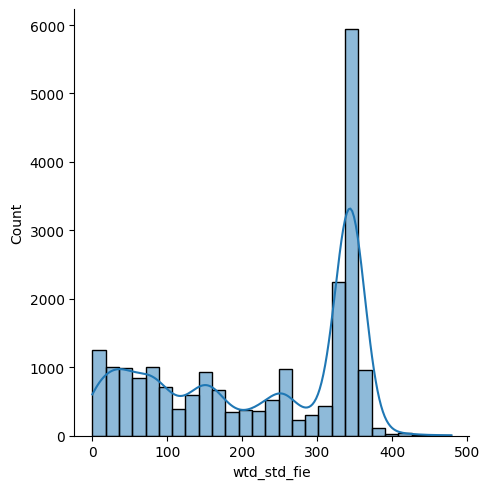

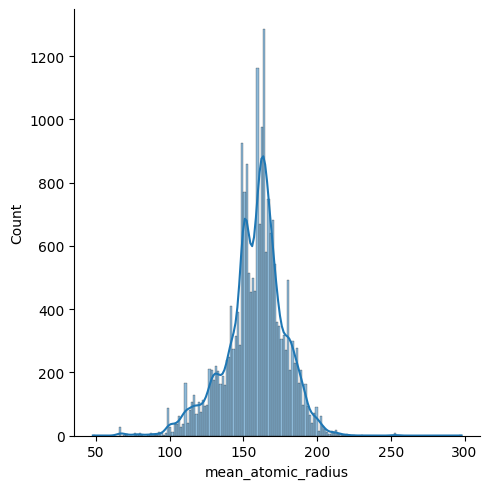

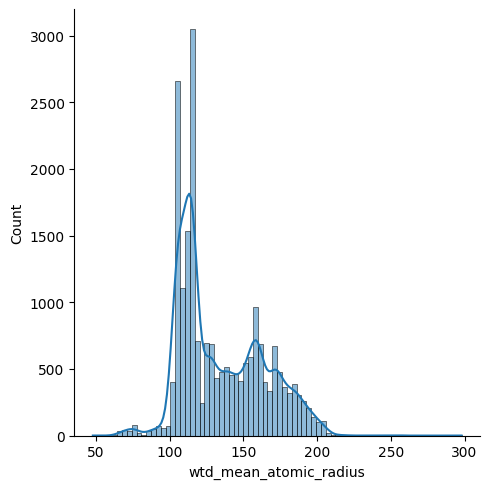

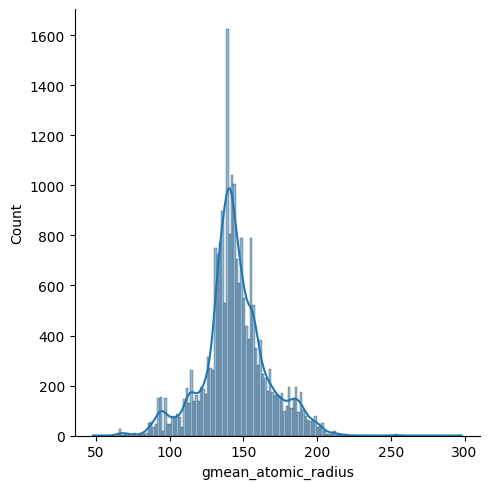

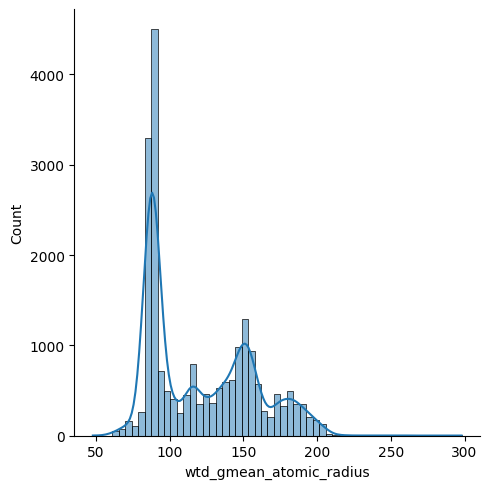

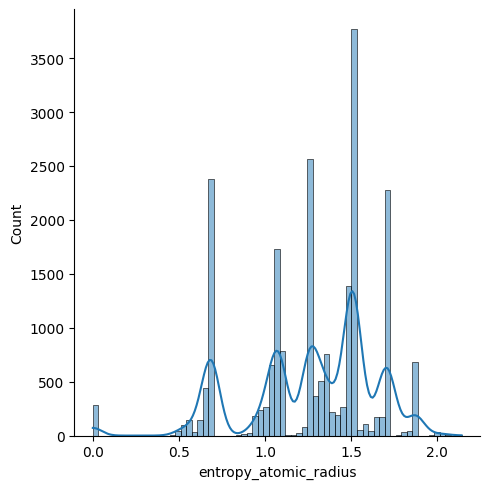

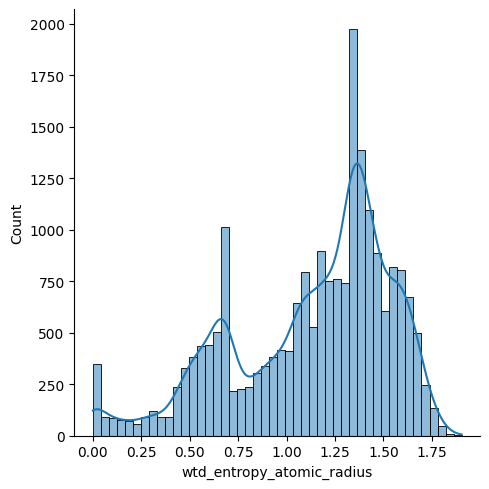

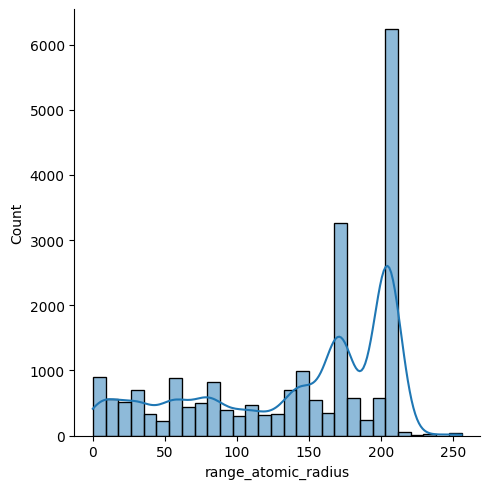

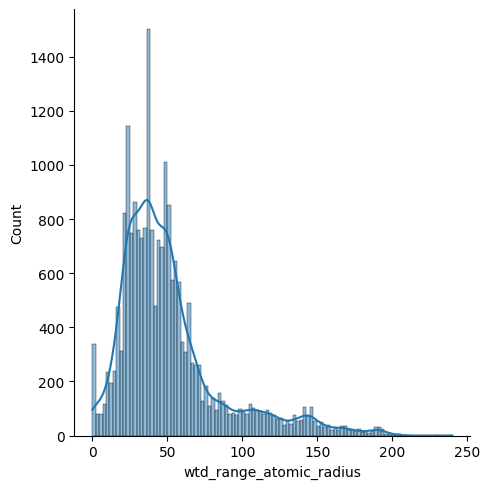

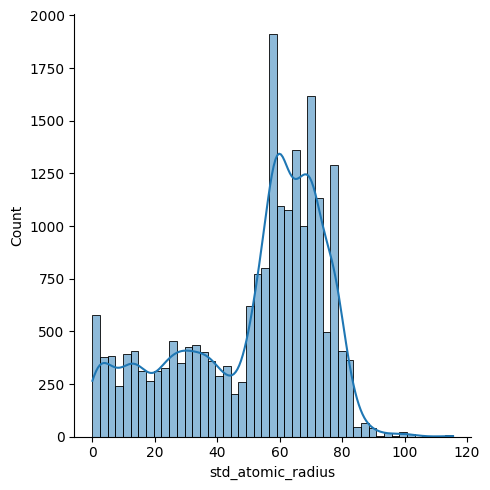

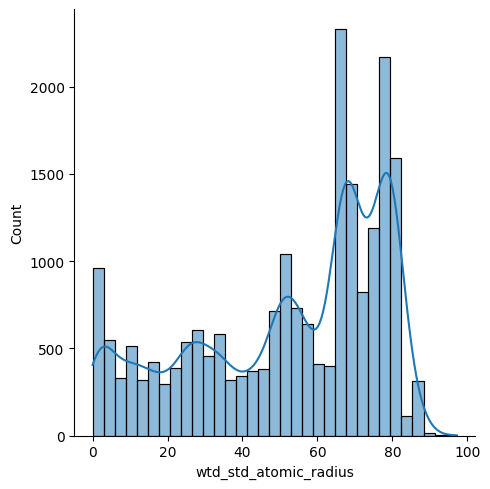

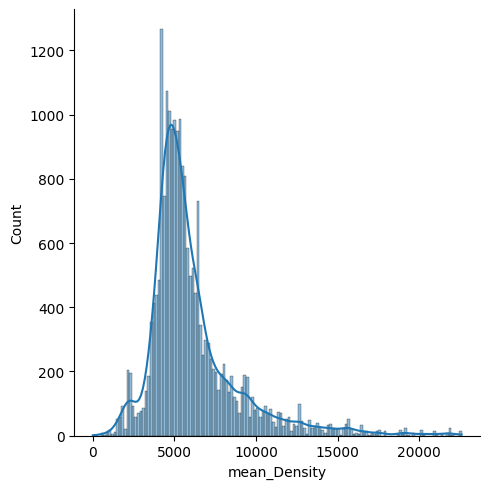

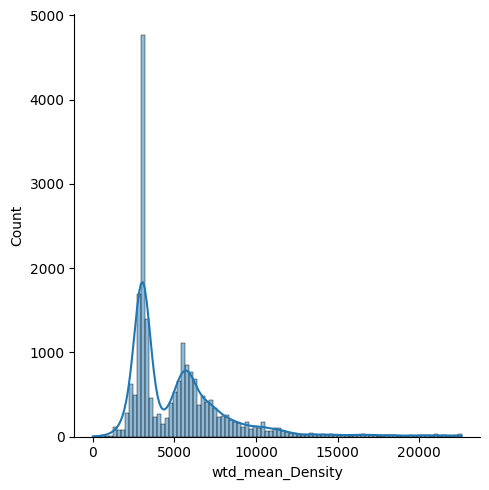

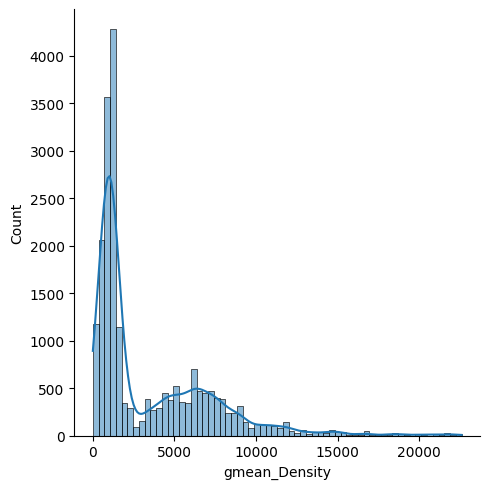

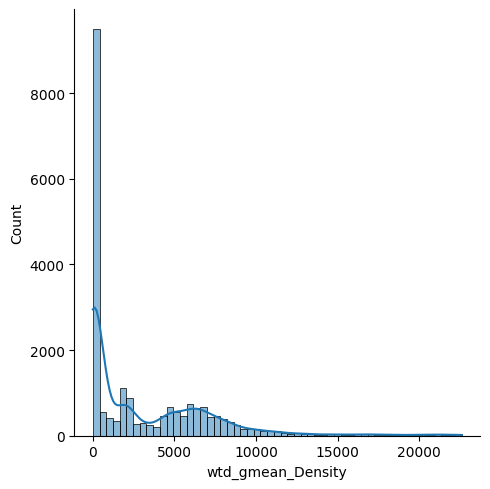

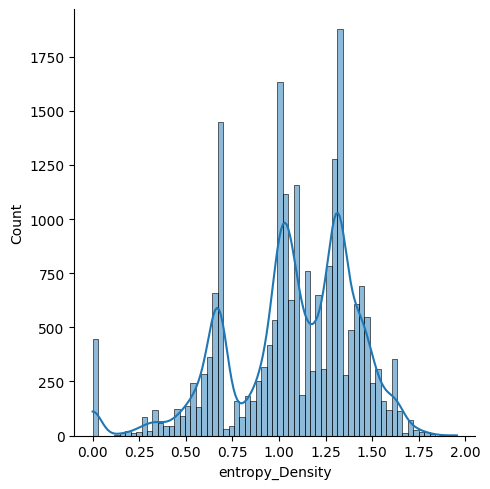

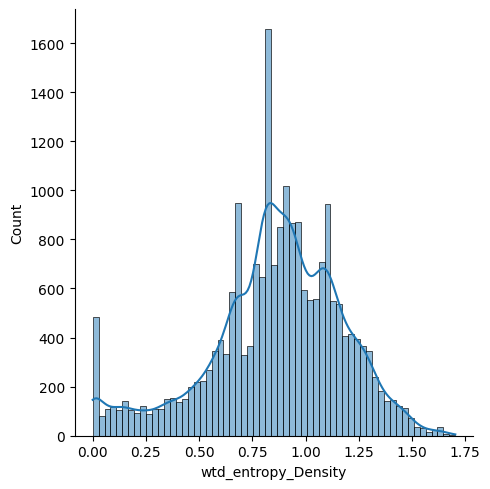

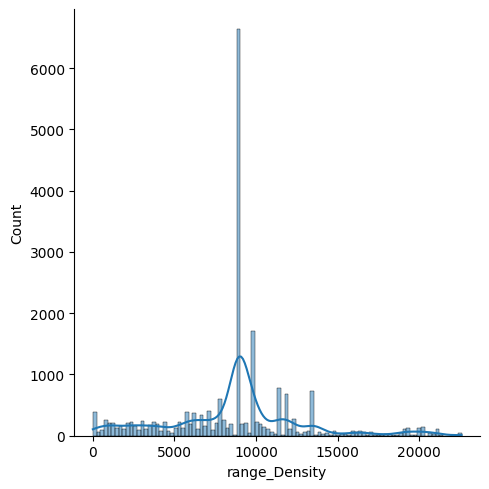

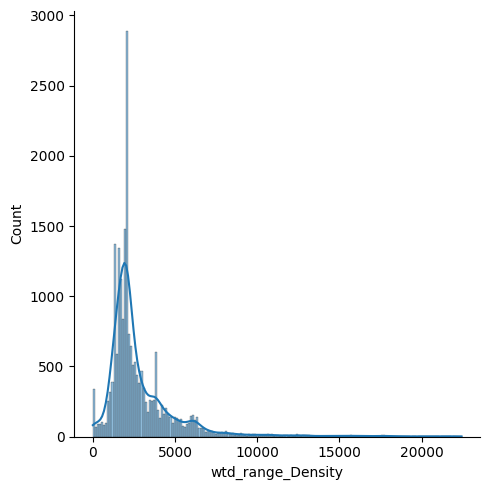

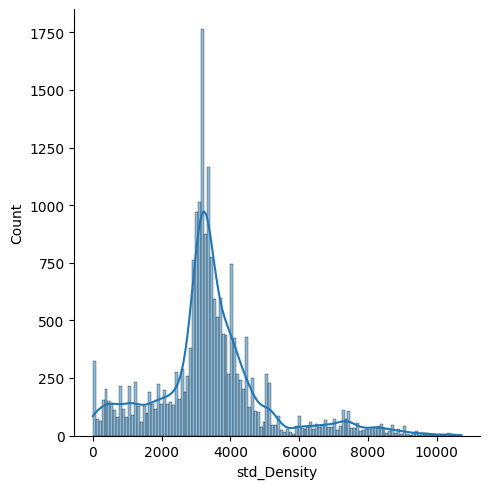

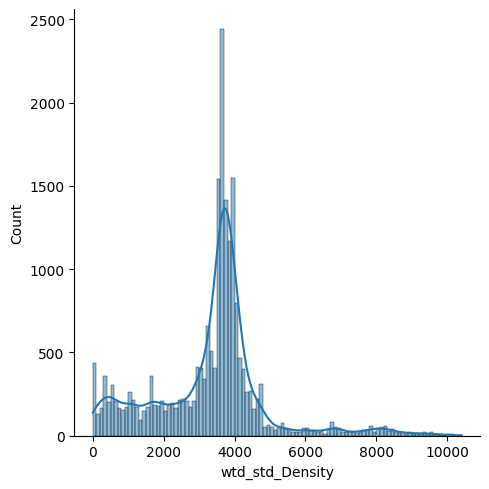

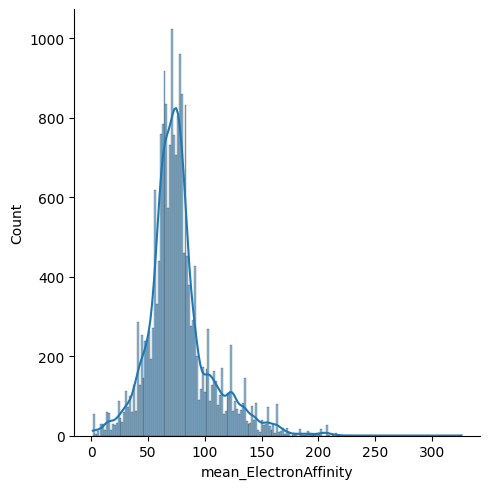

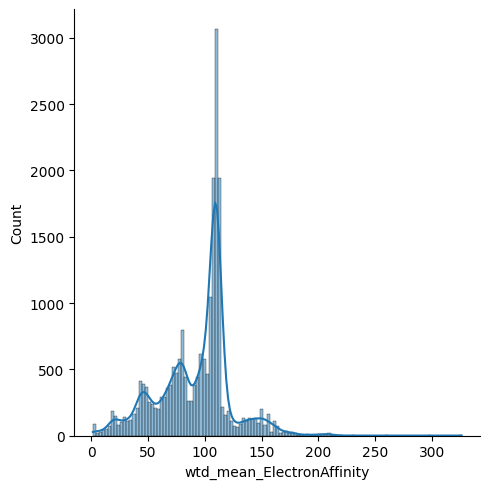

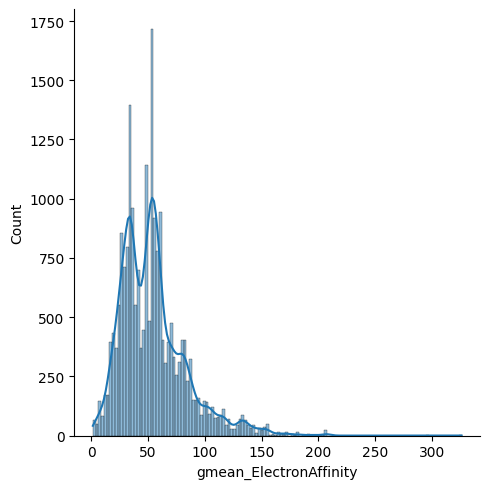

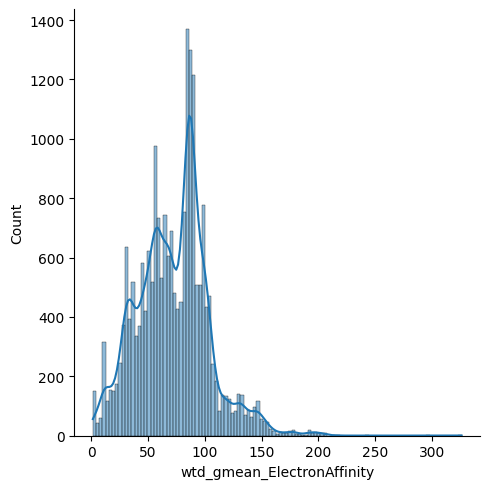

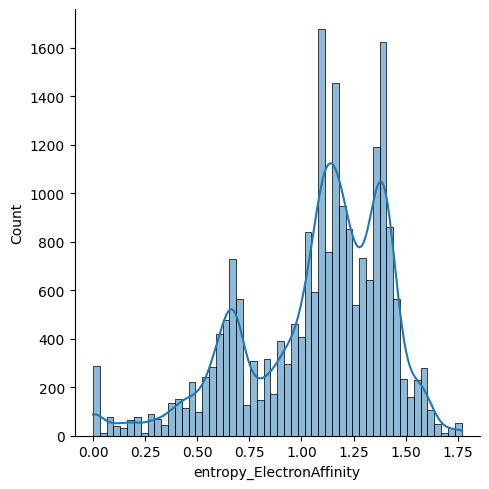

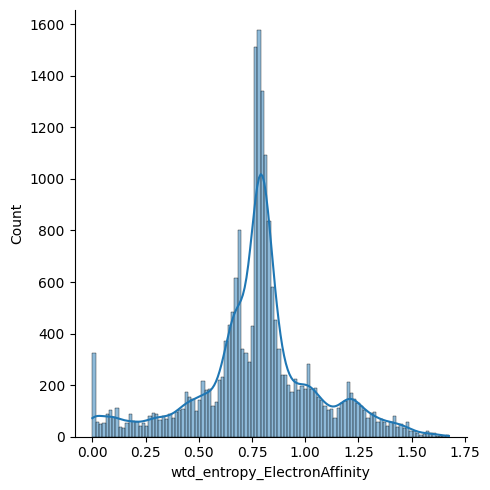

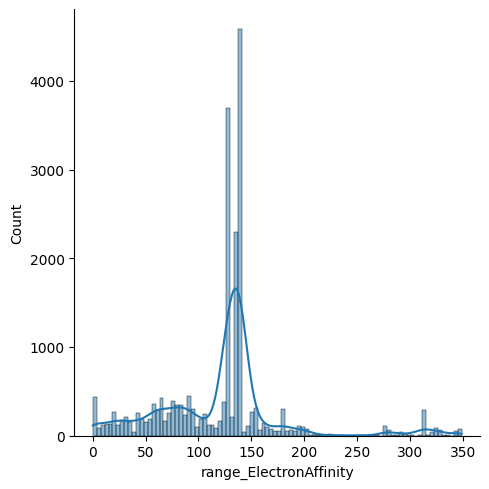

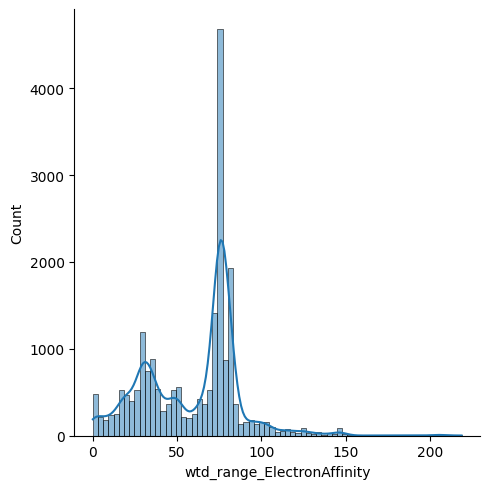

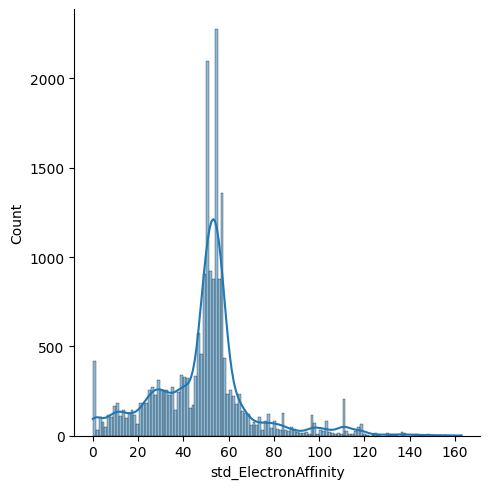

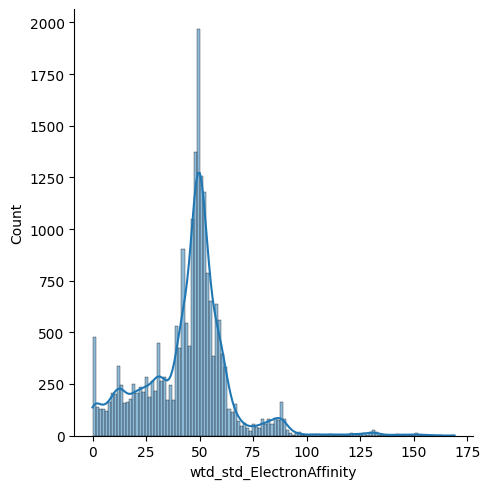

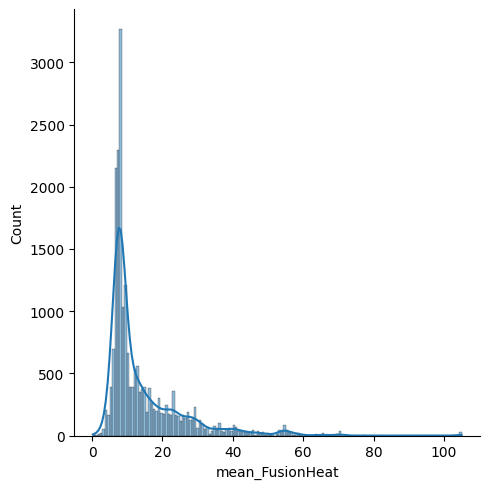

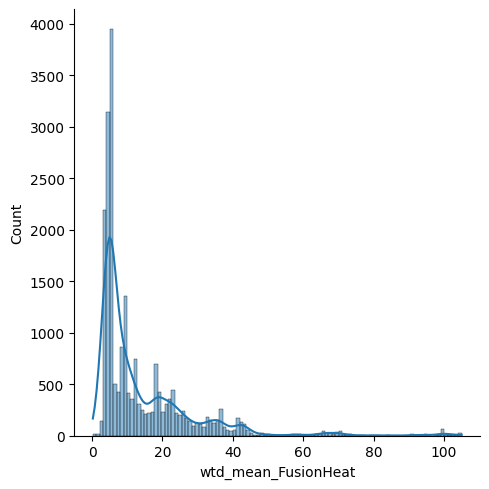

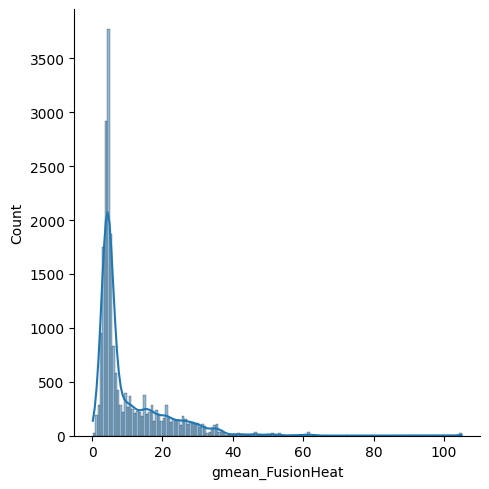

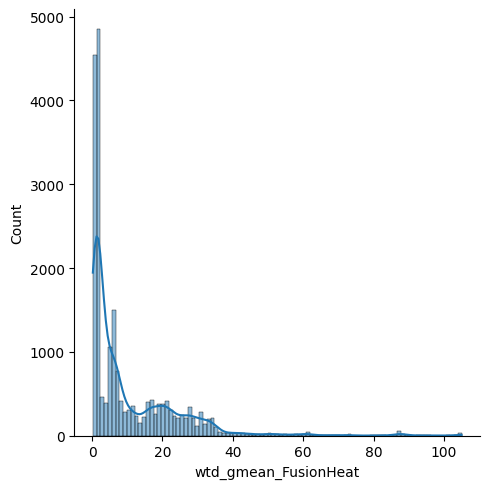

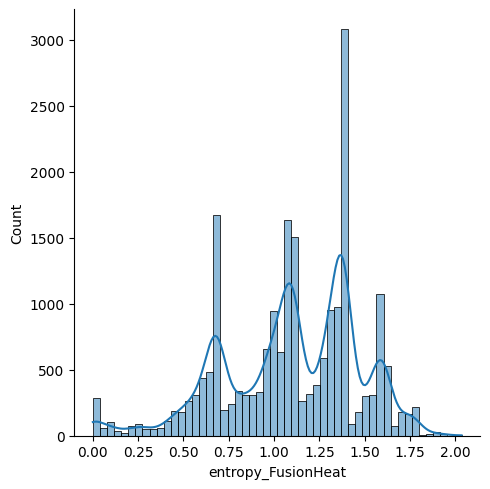

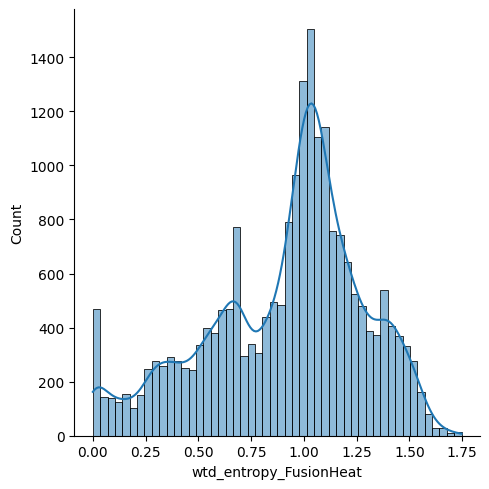

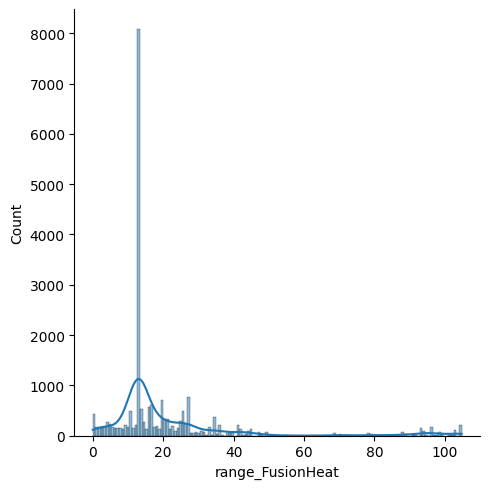

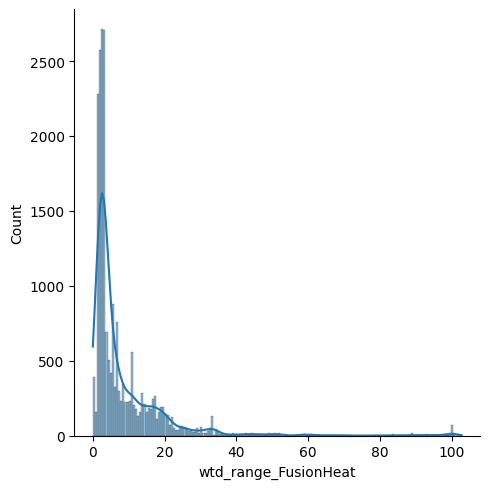

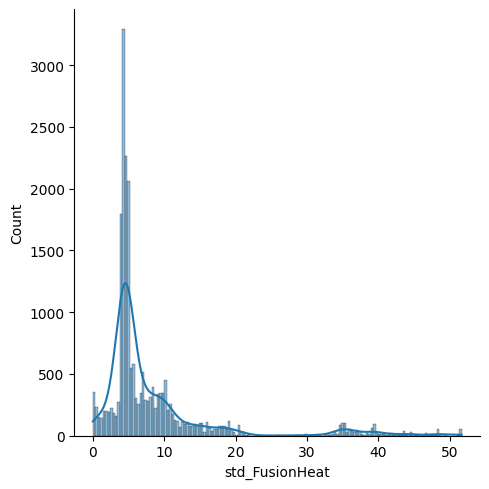

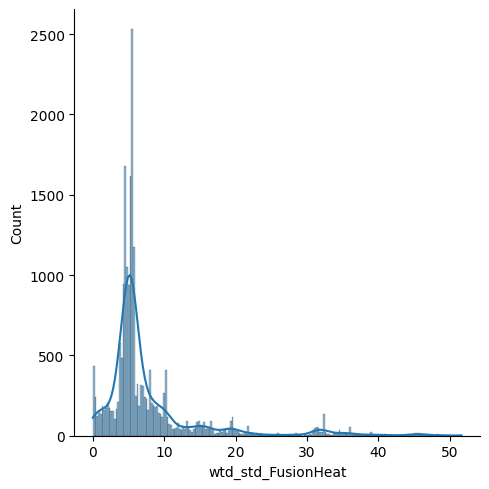

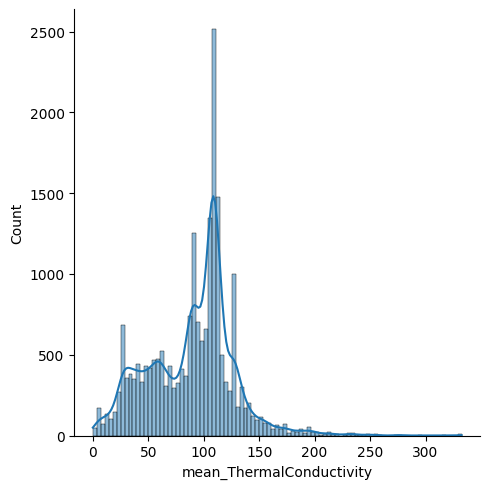

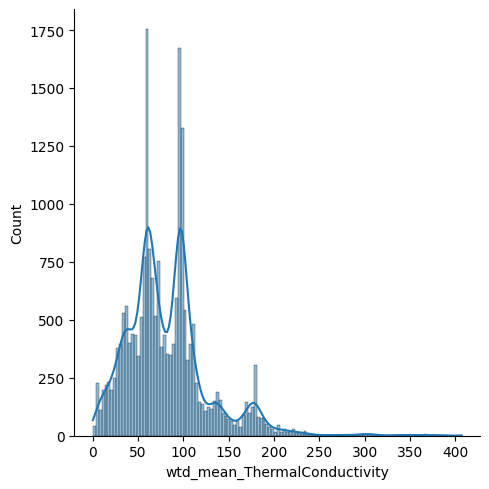

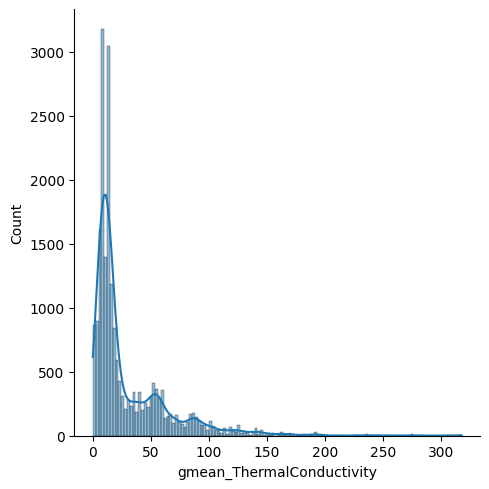

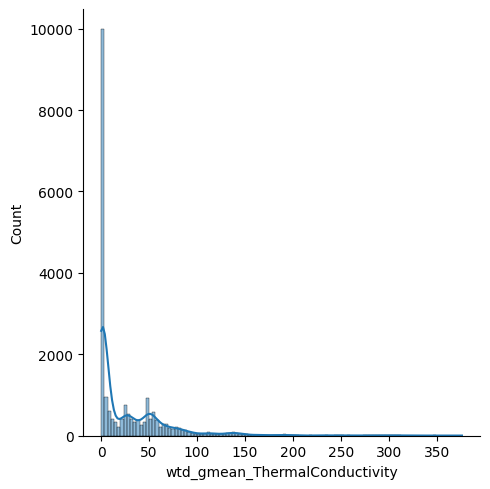

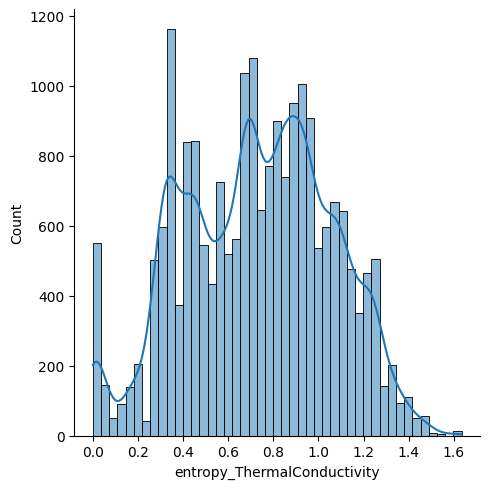

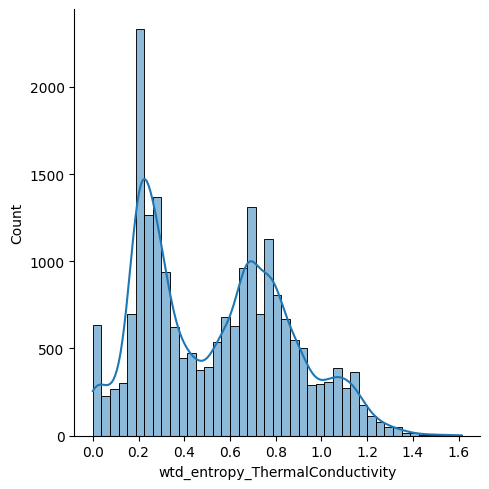

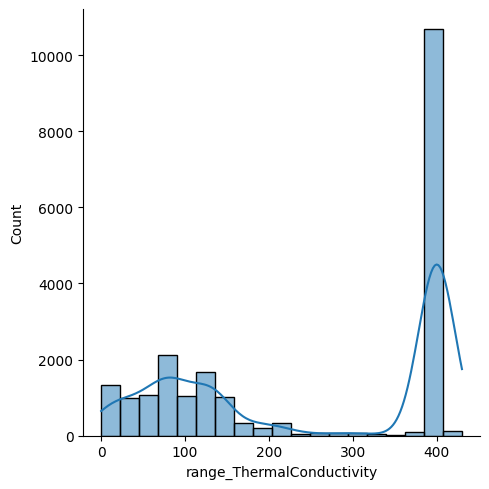

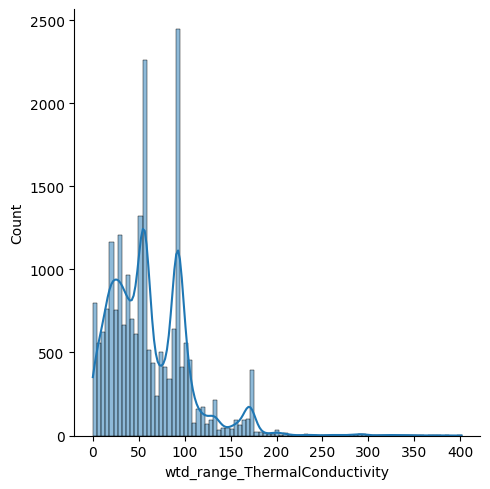

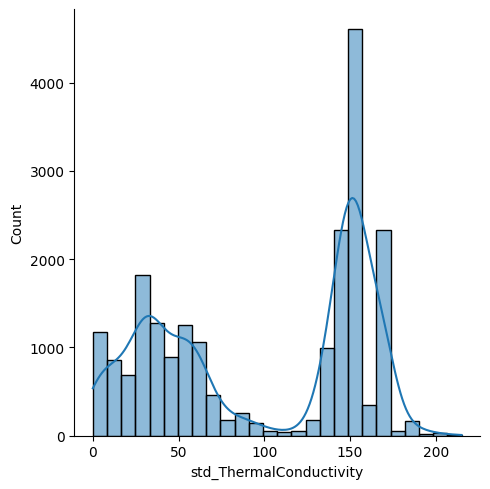

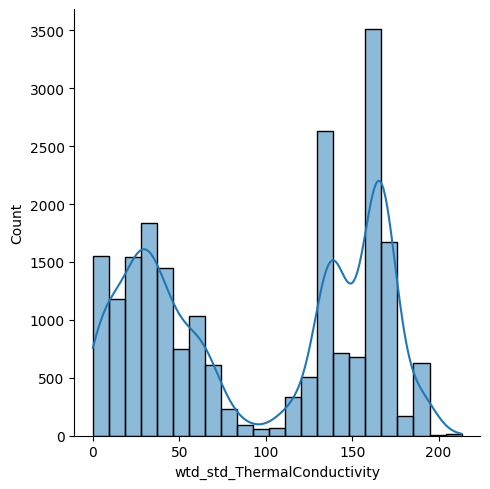

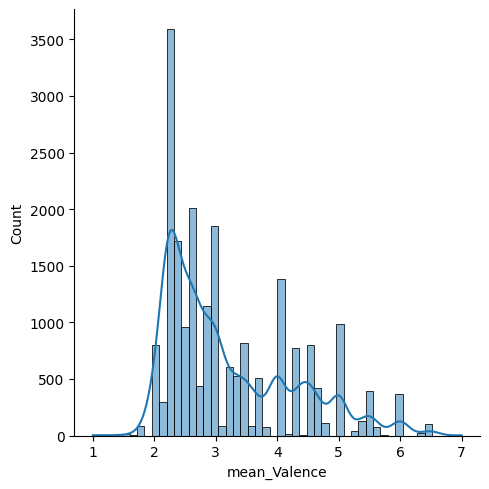

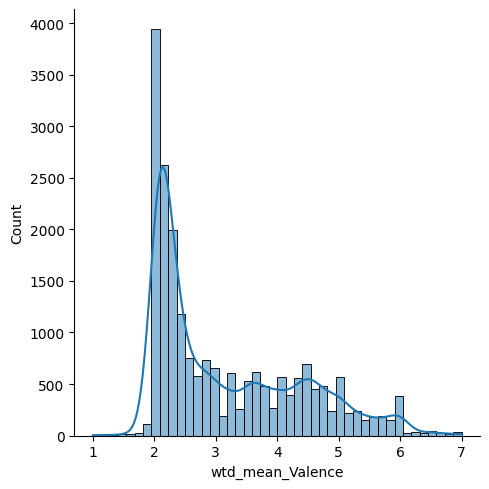

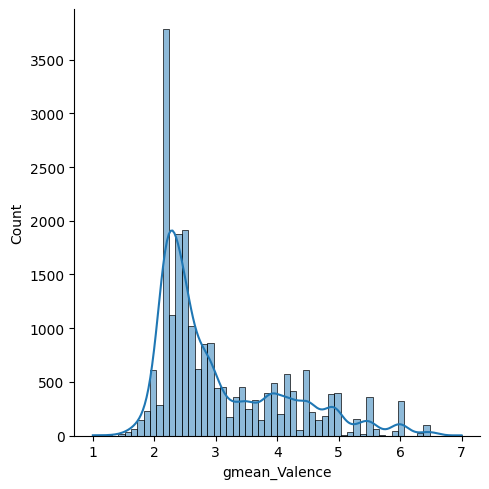

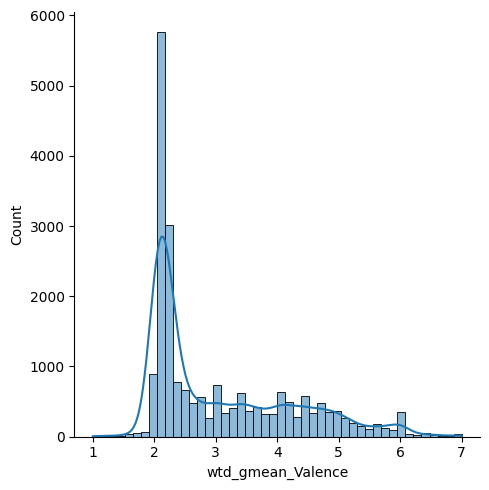

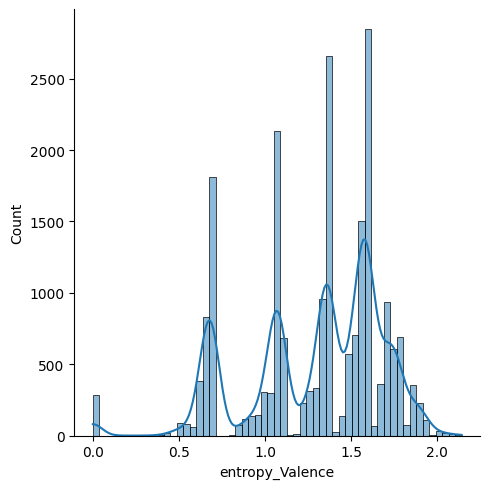

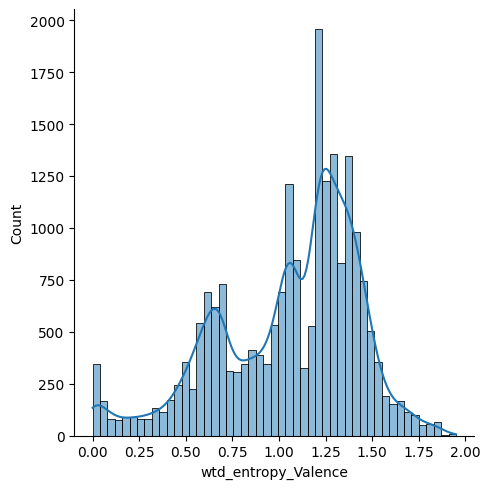

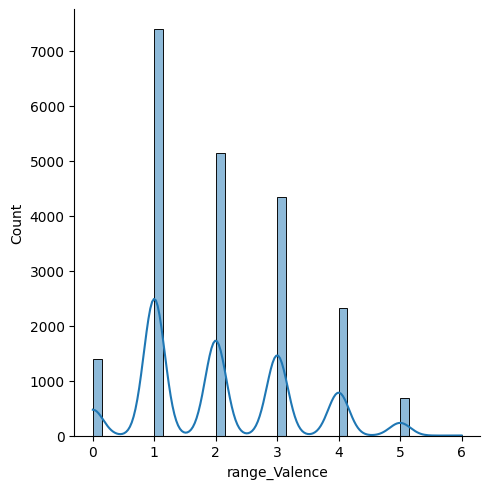

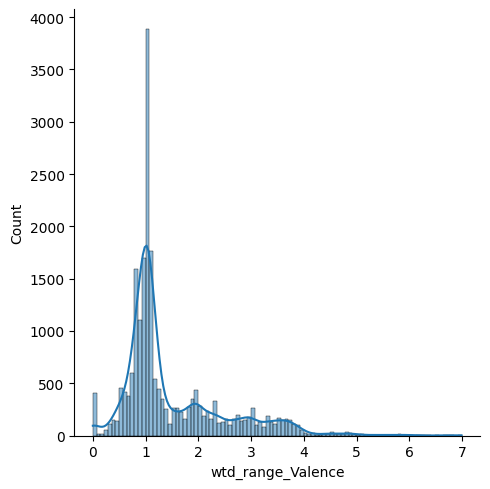

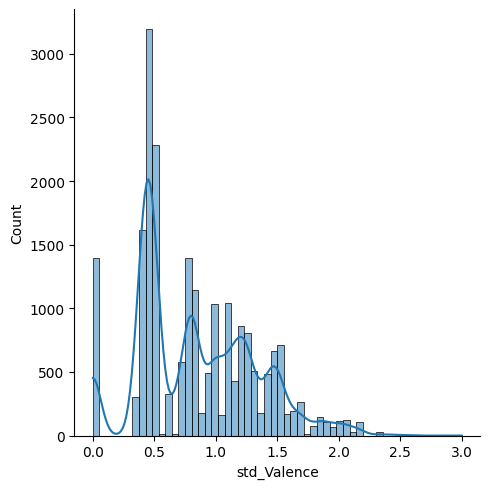

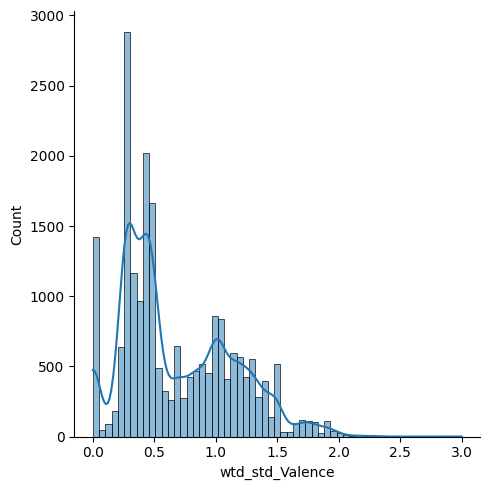

In [75]:
# run this chunk to view histograms of each feature
# commenting out bc output is too long
for i in df2_sub.columns:
     sns.displot(df2_sub[i], kde=True)
     plt.show()

# Preprocess

After prelim eda, we see that normalcy is met thus standard scaler is the most useful scaler for this data. For completeness, we showed that the internal cross validation metrics between scaled and unscaled data are equivalent.

In [36]:
X = df.drop(columns="critical_temp")
y = df["critical_temp"]

## No scaling

In [37]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [38]:
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["r2", "neg_root_mean_squared_error"]
scores = cross_validate(lr, X, y, 
                        cv=split,
                        scoring=scoring,
                        return_train_score=True,
                        return_estimator=True,
                        n_jobs=-1)
scores = pd.DataFrame(scores)
scores

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.707995,0.025457,LinearRegression(),0.770972,0.762466,-16.308913,-16.715386
1,1.698178,0.020149,LinearRegression(),-0.364983,0.769668,-40.298407,-16.409987
2,1.719137,0.030567,LinearRegression(),0.750902,0.767497,-17.031445,-16.532009
3,1.703514,0.015702,LinearRegression(),0.317922,0.764245,-28.201902,-16.644465
4,1.645889,0.022706,LinearRegression(),0.756333,0.765512,-16.989078,-16.567076


In [39]:
# this shows the slopes of each feature from the first fit
# commenting out bc out is too long
# scores["estimator"][0].coef_

In [40]:
# 5 fold internal cv on full data
print("Nonscaled r2: %.5f" % scores["test_r2"].mean())
print("Nonscaled rmse: %.5f" % np.abs(scores["test_neg_root_mean_squared_error"].mean()))

Nonscaled r2: 0.44623
Nonscaled rmse: 23.76595


## Standard Scaler

In [41]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", lr)
])
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [42]:
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["r2", "neg_root_mean_squared_error"]
scale_scores = cross_validate(pipe, X, y, 
                        cv=split,
                        scoring=scoring,
                        return_train_score=True,
                        return_estimator=True,
                        n_jobs=-1)
scale_scores = pd.DataFrame(scale_scores)
scale_scores

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.007123,0.026937,"(StandardScaler(), LinearRegression())",0.770972,0.762466,-16.308913,-16.715386
1,1.043054,0.021074,"(StandardScaler(), LinearRegression())",-0.364983,0.769668,-40.298407,-16.409987
2,1.053633,0.020122,"(StandardScaler(), LinearRegression())",0.750902,0.767497,-17.031445,-16.532009
3,1.025828,0.030256,"(StandardScaler(), LinearRegression())",0.317922,0.764245,-28.201902,-16.644465
4,1.040514,0.020228,"(StandardScaler(), LinearRegression())",0.756333,0.765512,-16.989078,-16.567076


In [43]:
# 5 fold internal cv on full data
print("std scale r2: %.5f" % scores["test_r2"].mean())
print("std scale rmse: %.5f" % np.abs(scores["test_neg_root_mean_squared_error"].mean()))

std scale r2: 0.44623
std scale rmse: 23.76595


# Modeling

## L1 / Lasso Gridsearch

In [44]:
lasso_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', Lasso(random_state=77))
])

params = {'model__alpha': (np.logspace(-1, 1, 200))} 
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["neg_root_mean_squared_error", "r2"]
# scoring = {"R2": "r2", "RMSE": make_scorer("neg_root_mean_squared_error", greater_is_better=False)}


lasso_gs = GridSearchCV(lasso_pipe,
						param_grid=params,
						cv=split,
						scoring=scoring,
                        refit="neg_root_mean_squared_error",
						n_jobs=-1
)

In [45]:
lasso_gs.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso(random_state=77))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([ 0.1       ,  0.10234114,  0.10473709,  0.10718913,  0.10969858,
        0.11226678,  0.1148951 ,  0.11758496,  0.12033778,  0.12315506,
        0.12603829,  0.12898903,  0.13200884,  0.13509935,  0.138262...
        5.11143348,  5.23109931,  5.35356668,  5.47890118,  5.60716994,
        5.73844165,  5.87278661,  6.01027678,  6.15098579,  6.29498899,
        6.44236351,  6.59318827,  6.74754405,  6.90551352,  7.06718127,
        7.2326339 ,  7.40196   ,  7.57525026,  7.75259749,  7.93409667,
        8.11984499,  8.30994195,  8.50448934,  8.70359136,  8.90735464,
        9.1158883 ,  9.32930403,  9.54771611,  9.77124154, 10.        ])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'])

In [46]:
lasso_results = pd.DataFrame(lasso_gs.cv_results_).sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
lasso_results[
    [
        "mean_test_neg_root_mean_squared_error",
        "mean_test_r2",
        "param_model__alpha"
    ]
].head(5)

,mean_test_neg_root_mean_squared_error,mean_test_r2,param_model__alpha
130,-20.087865,0.655845,2.025502
129,-20.089264,0.655723,1.979167
131,-20.090978,0.655796,2.072922
128,-20.091017,0.655580,1.933892
127,-20.096490,0.655293,1.889652


### Feature importance

In [47]:
lasso_feat_imp = pd.DataFrame({"Parameter":lasso_gs.best_estimator_.named_steps["model"].coef_, "Feature":lasso_gs.best_estimator_[:-1].get_feature_names_out()}, 
                             index=lasso_gs.best_estimator_[:-1].get_feature_names_out()
)

In [48]:
lasso_feat_imp["Parameter_Rank"] = ((lasso_feat_imp["Parameter"].abs().to_numpy()*-1).argsort().argsort() + 1)
lasso_feat_imp = lasso_feat_imp.reindex(lasso_feat_imp["Parameter"].abs().sort_values(ascending=False).index)
lasso_feat_imp.reset_index(drop=True, inplace=True)
lasso_feat_imp.head(20)

,Parameter,Feature,Parameter_Rank
0,11.416835,wtd_std_ThermalConductivity,1
1,7.531124,Ba,2
2,3.185943,wtd_entropy_atomic_mass,3
3,3.115142,Ca,4
4,-2.097953,wtd_gmean_ElectronAffinity,5
5,-2.014136,wtd_std_Valence,6
6,1.686567,Bi,7
7,1.538015,range_atomic_radius,8
8,1.368411,range_fie,9
9,-1.269696,Si,10


## L2 / Ridge Gridsearch

In [49]:
ridge_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ('model', Ridge(random_state=77))
])

params = {'model__alpha': (np.logspace(-1, 2, 300))} 
split = KFold(shuffle=True, 
              n_splits=5, 
              random_state=77)
scoring = ["neg_root_mean_squared_error", "r2"]
# scoring = {"R2": "r2", "RMSE": make_scorer("neg_root_mean_squared_error", greater_is_better=False)}


ridge_gs = GridSearchCV(ridge_pipe,
						param_grid=params,
						cv=split,
						scoring=scoring,
                        refit="neg_root_mean_squared_error",
						n_jobs=-1
)

In [50]:
ridge_gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=77, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(random_state=77))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([  0.1       ,   0.10233718,   0.10472898,   0.10717669,
         0.1096816 ,   0.11224506,   0.11486843,   0.11755311,
         0.12030053,   0.12311217,   0.12598953,   0.12893413,
         0.13194755,   0.1350314 ,   0.1381873...
        58.78016072,  60.1539588 ,  61.55986501,  62.99862978,
        64.47102107,  65.9778248 ,  67.51984523,  69.09790546,
        70.71284779,  72.36553423,  74.05684692,  75.78768864,
        77.55898323,  79.37167617,  81.226735  ,  83.1251499 ,
        85.06793416,  87.05612479,  89.09078301,  91.17299485,
        93.30387173,  95.48455103,  97.71619673, 100.        ])},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'r2'])

In [51]:
ridge_results = pd.DataFrame(ridge_gs.cv_results_).sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
ridge_results[
    [
        "mean_test_neg_root_mean_squared_error",
        "mean_test_r2",
        "param_model__alpha"
    ]
].head(5)

,mean_test_neg_root_mean_squared_error,mean_test_r2,param_model__alpha
299,-22.430580,0.533886,100.0
298,-22.434626,0.533604,97.716197
297,-22.438754,0.533319,95.484551
296,-22.442965,0.533029,93.303872
295,-22.447259,0.532734,91.172995


### Feature importance

In [52]:
ridge_feat_imp = pd.DataFrame({"Parameter":ridge_gs.best_estimator_.named_steps["model"].coef_, "Feature":ridge_gs.best_estimator_[:-1].get_feature_names_out()}, 
                             index=ridge_gs.best_estimator_[:-1].get_feature_names_out()
)

In [53]:
ridge_feat_imp["Parameter_Rank"] = ((ridge_feat_imp["Parameter"].abs().to_numpy()*-1).argsort().argsort() + 1)
ridge_feat_imp = ridge_feat_imp.reindex(ridge_feat_imp["Parameter"].abs().sort_values(ascending=False).index)
ridge_feat_imp.reset_index(drop=True, inplace=True)
ridge_feat_imp.head(20)

,Parameter,Feature,Parameter_Rank
0,14.107843,wtd_mean_ThermalConductivity,1
1,12.494664,std_ElectronAffinity,2
2,-9.661939,range_ElectronAffinity,3
3,8.592817,Ba,4
4,7.840255,range_atomic_mass,5
5,-7.663575,wtd_mean_atomic_mass,6
6,7.607960,wtd_std_ThermalConductivity,7
7,-7.507625,wtd_gmean_ElectronAffinity,8
8,-7.451777,wtd_gmean_ThermalConductivity,9
9,-7.024038,std_atomic_radius,10
